In [1]:
# Install dependencies (run this once ever 12 hours)
!pip install --upgrade git+https://github.com/tomsilver/pddlgym # Install most recent PDDLGym (must be from source!)

  Cloning https://github.com/tomsilver/pddlgym to /private/var/folders/2y/1l8njzj51qd7b7jnwzz5v2bm0000gn/T/pip-req-build-93plu35a
  Created wheel for pddlgym: filename=pddlgym-0.0.1-py3-none-any.whl size=5111273 sha256=6268cdf1dd7614f822ad13babde21d35f2dcb41c8aac32275b6a7fc791cd312e
  Stored in directory: /private/var/folders/2y/1l8njzj51qd7b7jnwzz5v2bm0000gn/T/pip-ephem-wheel-cache-f2hwo24g/wheels/70/00/da/84f1ea25112e85e8e4218a6905deae211edd977267c483f457
Successfully built pddlgym
  Attempting uninstall: pddlgym
    Found existing installation: pddlgym 0.0.1
    Uninstalling pddlgym-0.0.1:
      Successfully uninstalled pddlgym-0.0.1


In [2]:
import gym
import pddlgym
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
def display_image(img, title=None):
    """Render a figure inline
    """
    plt.figure()
    if title:
        plt.title(title)
    plt.imshow(img)
    _ = plt.axis('off')

def display_environment_info(env, num_problems_to_show=5):
    """Render the first few states of the environment and report how many initial states there are.
    """
    num_initial_states = len(env.problems)
    num_problems_to_show = min(num_problems_to_show, num_initial_states)

    print(f"This environment has {num_initial_states} initial states. Here are the first {num_problems_to_show} rendered:")
    fig, axes = plt.subplots(1, num_problems_to_show, figsize=(num_problems_to_show*5, 5))
    for idx, ax in enumerate(axes):
        env.fix_problem_index(idx)
        env.reset()
        img = env.render()
        ax.imshow(img)
        ax.axis('off')

In [ ]:
def run_plan(env, plan, problem_index=0, render=False):
    """Run a sequence of actions in the environment. Report whether the plan succeeded.
    """
    # Reset the environment to the initial state
    env.fix_problem_index(problem_index)
    state, debug_info = env.reset()
    if render:
        display_image(env.render_from_state(state), "Initial state")
    for action in plan:
        # Advances the state of the environment
        state, reward, done, debug_info = env.step(action)
        if render:
            display_image(env.render_from_state(state), f"State after action {action}")
        if done:
            assert reward == 1
            return True
    return False

In [4]:
def run_plan_execution_example():
    """Example demonstrating how to run a plan in the environment.
    """
    env = gym.make("SearchAndRescueLevel1-v0")
    env.reset()
    actions = dropoff, move_down, move_left, move_right, move_up, pickup_person0 = env.get_possible_actions()
    print("All possible actions:", actions)
    plan = [move_left, move_left, move_down, move_left, pickup_person0, move_right, dropoff, move_up]
    success = run_plan(env, plan, problem_index=0, render=True)
    print(f"Plan success: {success}")

In [8]:
def run_get_successor_example():
    """Example demonstrating how to get successors for the environment.
    """
    env = gym.make("SearchAndRescueLevel1-v0")
    get_successor_state = env.get_successor_state # The environment provides a successor generator
    initial_state, _ = env.reset()
    display_image(env.render_from_state(initial_state), "Initial state")
    actions = dropoff, move_down, move_left, move_right, move_up, pickup_person0 = env.get_possible_actions()
    print("All possible actions:", actions)
    for action in actions:
        # Get the next state given the initial state and action
        state = get_successor_state(initial_state, action)
        display_image(env.render_from_state(state), f"Successor from {action}")

All possible actions: [dropoff(), move(down:direction), move(left:direction), move(right:direction), move(up:direction), pickup(person0:person)]
Plan success: False


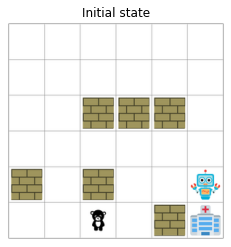

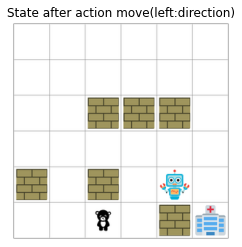

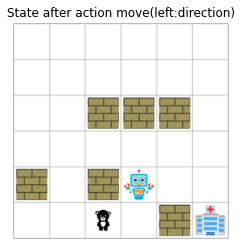

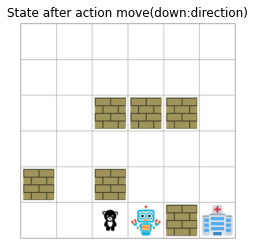

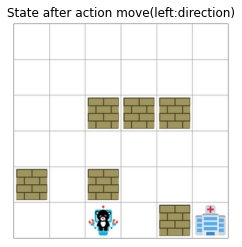

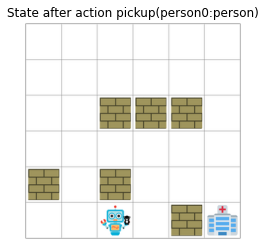

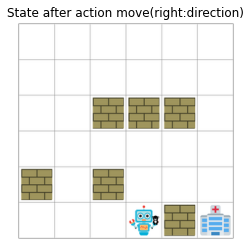

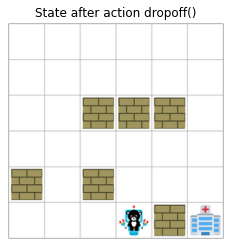

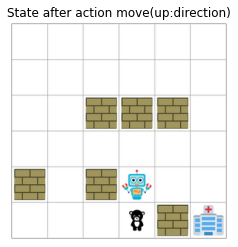

In [6]:
run_plan_execution_example()

All possible actions: [dropoff(), move(down:direction), move(left:direction), move(right:direction), move(up:direction), pickup(person0:person)]


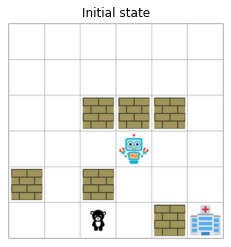

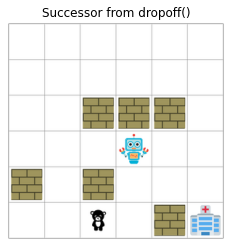

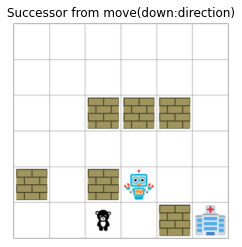

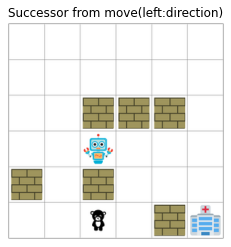

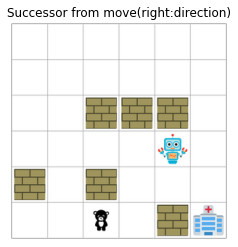

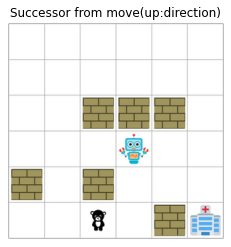

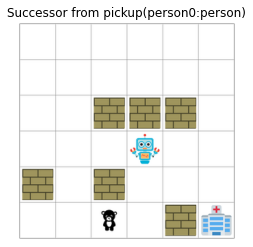

In [9]:
run_get_successor_example()